<a href="https://colab.research.google.com/github/Sanjai0610/credit-scoring-model/blob/main/Credit_scoring_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score,
                             confusion_matrix, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [3]:
!unzip -q "archive.zip" -d "/content/data"
!ls -la /content/data


total 45424
drwxr-xr-x 2 root root     4096 Aug  7 05:23 .
drwxr-xr-x 1 root root     4096 Aug  7 05:23 ..
-rw-r--r-- 1 root root 15366486 Jun 22  2022 test.csv
-rw-r--r-- 1 root root 31136044 Jun 22  2022 train.csv


In [4]:
import os

print(os.listdir("/content"))  # should list 'train.csv' and 'test.csv'



['.config', 'archive.zip', 'data', 'sample_data']


In [5]:
import pandas as pd

# Load train and test CSVs from /content/data
train_df = pd.read_csv("/content/data/train.csv")
test_df = pd.read_csv("/content/data/test.csv")

# View the first few rows
print(train_df.head())
print(test_df.head())


/tmp/ipython-input-2271275897.py:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("/content/data/train.csv")


       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

In [6]:
print(train_df.info())
print(train_df.describe())
print(train_df.isnull().sum())  # Check for missing values
print(train_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
for col in train_df.select_dtypes(include='object').columns:
    mixed_types = train_df[col].apply(lambda x: type(x)).value_counts()
    print(f"{col}: {mixed_types}")


ID: ID
<class 'str'>    100000
Name: count, dtype: int64
Customer_ID: Customer_ID
<class 'str'>    100000
Name: count, dtype: int64
Month: Month
<class 'str'>    100000
Name: count, dtype: int64
Name: Name
<class 'str'>      90015
<class 'float'>     9985
Name: count, dtype: int64
Age: Age
<class 'str'>    100000
Name: count, dtype: int64
SSN: SSN
<class 'str'>    100000
Name: count, dtype: int64
Occupation: Occupation
<class 'str'>    100000
Name: count, dtype: int64
Annual_Income: Annual_Income
<class 'str'>    100000
Name: count, dtype: int64
Num_of_Loan: Num_of_Loan
<class 'str'>    100000
Name: count, dtype: int64
Type_of_Loan: Type_of_Loan
<class 'str'>      88592
<class 'float'>    11408
Name: count, dtype: int64
Num_of_Delayed_Payment: Num_of_Delayed_Payment
<class 'str'>      92998
<class 'float'>     7002
Name: count, dtype: int64
Changed_Credit_Limit: Changed_Credit_Limit
<class 'str'>    100000
Name: count, dtype: int64
Credit_Mix: Credit_Mix
<class 'str'>    100000
Name: c

In [8]:
for col in train_df.select_dtypes(include='object').columns:
    train_df[col] = train_df[col].fillna("Unknown")


In [9]:
cat_cols = train_df.select_dtypes(include='object').columns
print(cat_cols)



Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [10]:
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(train_df[col].apply(lambda x: type(x)).value_counts())
for col in cat_cols:
    train_df[col] = train_df[col].astype(str).fillna("Unknown")



Column: ID
ID
<class 'str'>    100000
Name: count, dtype: int64

Column: Customer_ID
Customer_ID
<class 'str'>    100000
Name: count, dtype: int64

Column: Month
Month
<class 'str'>    100000
Name: count, dtype: int64

Column: Name
Name
<class 'str'>    100000
Name: count, dtype: int64

Column: Age
Age
<class 'str'>    100000
Name: count, dtype: int64

Column: SSN
SSN
<class 'str'>    100000
Name: count, dtype: int64

Column: Occupation
Occupation
<class 'str'>    100000
Name: count, dtype: int64

Column: Annual_Income
Annual_Income
<class 'str'>    100000
Name: count, dtype: int64

Column: Num_of_Loan
Num_of_Loan
<class 'str'>    100000
Name: count, dtype: int64

Column: Type_of_Loan
Type_of_Loan
<class 'str'>    100000
Name: count, dtype: int64

Column: Num_of_Delayed_Payment
Num_of_Delayed_Payment
<class 'str'>    100000
Name: count, dtype: int64

Column: Changed_Credit_Limit
Changed_Credit_Limit
<class 'str'>    100000
Name: count, dtype: int64

Column: Credit_Mix
Credit_Mix
<clas

In [11]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])


In [17]:
print(train_df.dtypes)


ID                            int64
Customer_ID                   int64
Month                         int64
Name                          int64
Age                           int64
SSN                           int64
Occupation                    int64
Annual_Income                 int64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                  int64
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit          int64
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt              int64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly       int64
Payment_Behaviour             int64
Monthly_Balance               int64
Credit_Score                

In [12]:
print(train_df.columns)



Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [13]:
print(train_df.columns)
print(train_df.head())
target_column = 'your_target_column_here'
target_column = 'Credit_Score'
X = train_df.drop(target_column, axis=1)
y = train_df[target_column]

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')
      ID  Customer_ID  Month  Name  Age    SSN  Occupation  Annual_Income  \
0  16406        12320      3    84  308  10205          12           6011   
1  16417        12320      2    84  308  10205          12           6011   
2  16428        12320      6    84    0  10205          12           6011   
3  16441        12320      0    84  308  10205          12           6011   
4  16452        12320

In [18]:
from sklearn.impute import SimpleImputer

# Impute missing values (you can use mean/median strategy as appropriate)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train_imputed, y_train)




DecisionTreeClassifier()

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_imputed, y_train)


RandomForestClassifier()

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Train models
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_imputed, y_train)

dtree = DecisionTreeClassifier()
dtree.fit(X_train_imputed, y_train)

rf = RandomForestClassifier()
rf.fit(X_train_imputed, y_train)




RandomForestClassifier()

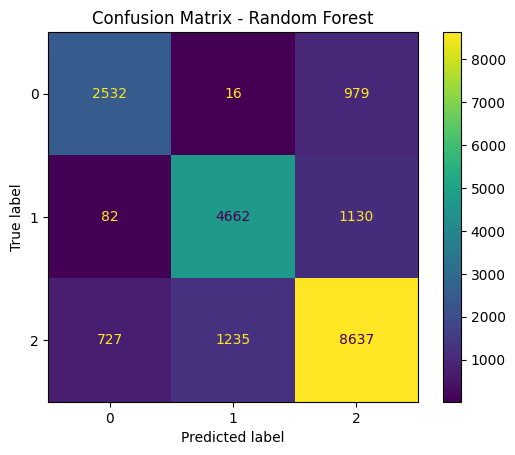

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(rf, X_val, y_val)
plt.title("Confusion Matrix - Random Forest")
plt.show()


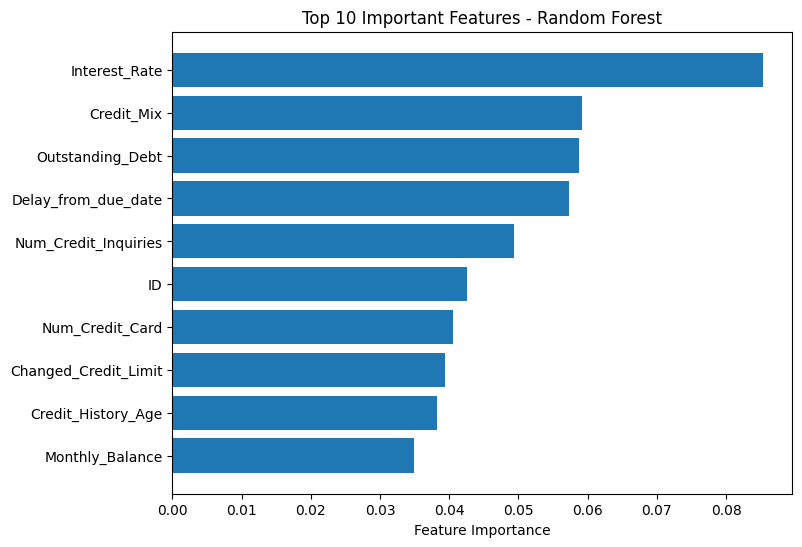

In [22]:
import pandas as pd
import numpy as np

feature_names = train_df.drop("Credit_Score", axis=1).columns
importances = rf.feature_importances_

# Plot top 10 important features
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Feature Importance")
plt.show()


In [23]:
test_df = pd.read_csv("/content/data/test.csv")

# Fill missing and convert all object columns
for col in test_df.select_dtypes(include='object').columns:
    test_df[col] = test_df[col].astype(str).fillna("Unknown")

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
for col in test_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    test_df[col] = le.fit_transform(test_df[col])

# Fill numeric missing values
for col in test_df.select_dtypes(include=['int64', 'float64']).columns:
    test_df[col] = test_df[col].fillna(test_df[col].median())

# Scale features
test_scaled = scaler.transform(test_df)
predictions = rf.predict(test_scaled)

# Save predictions
pd.DataFrame({
    "Customer_ID": test_df["Customer_ID"],  # or any ID column
    "Predicted_Credit_Score": predictions
}).to_csv("credit_score_predictions.csv", index=False)


In [24]:
import plotly.graph_objects as go

# Example prediction from model (replace this with your actual predicted score)
predicted_score = rf.predict(X_val_imputed[0].reshape(1, -1))[0]

# Convert predicted score to a value from 0 to 1000:
# Let's say:
# 0 = Poor → 250
# 1 = Standard → 500
# 2 = Good → 850
score_map = {0: 250, 1: 500, 2: 850}
score_value = score_map[predicted_score]

# Define label
label = "Good" if predicted_score == 2 else "Not Good"

# Create gauge chart
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=score_value,
    title={'text': f"Credit Score: {label}"},
    gauge={
        'axis': {'range': [0, 1000]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 400], 'color': "red"},      # Poor
            {'range': [400, 700], 'color': "orange"}, # Standard
            {'range': [700, 1000], 'color': "green"}  # Good
        ],
        'threshold': {
            'line': {'color': "black", 'width': 4},
            'thickness': 0.75,
            'value': score_value
        }
    }
))

fig.show()
